In [1]:

import joblib
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import regex as re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,model_selection,linear_model
from sklearn.metrics import r2_score
from model.linear_multiple import multipleLinearRegression





full_df=pd.read_csv("car details v4.csv")



<Axes: >

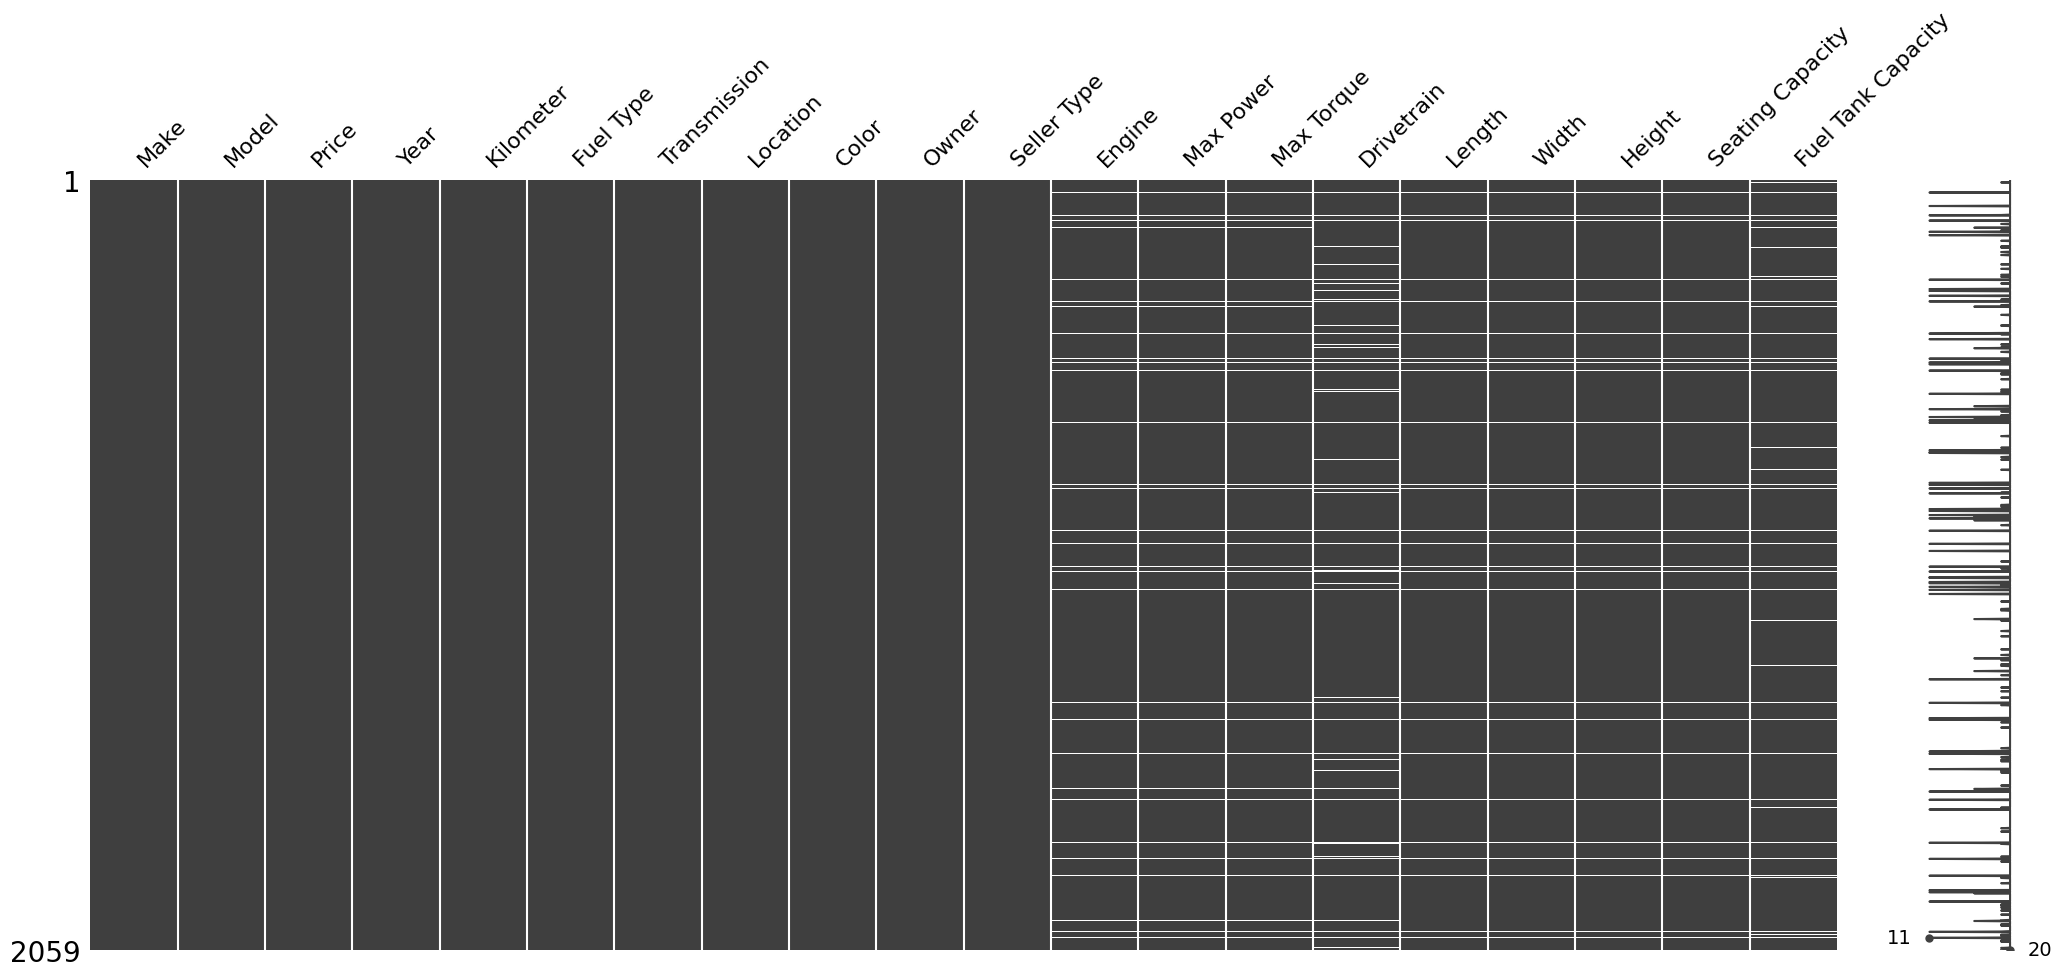

In [2]:

msno.matrix(full_df)


In [3]:
full_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [4]:

full_df.info()






def extract_engine_capacity(row):
    if pd.isna(row['Engine']):
        match = re.search(r'\b(\d+\.\d+)\b', row['Model'])
        if match:
            return str(int(float(match.group(1))*1000))
        else:
            return np.NaN
    return row['Engine']

full_df['Engine'] = full_df.apply(extract_engine_capacity, axis=1)


def extract_drivetrain(group):
    mode_value = group['Drivetrain'].mode().iloc[0]
    return group.fillna({'Drivetrain': mode_value})

full_df = full_df.groupby('Make').apply(extract_drivetrain)


full_df = full_df.dropna()
full_df['Engine'] = full_df['Engine'].str.replace('cc', '').astype(int)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

<Axes: >

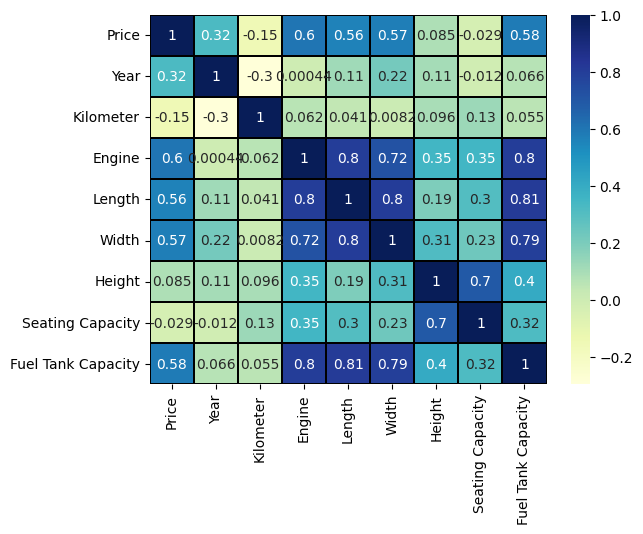

In [5]:

analysis_df = full_df.drop(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain', 'Max Power', 'Max Torque'], axis=1)
sns.heatmap(analysis_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.1, linecolor='black')

In [6]:
#sns.pairplot(analysis_df)

In [7]:


full_df[['bhp', 'rpm power']] = full_df['Max Power'].str.split('@', expand=True)
full_df['bhp'] = full_df['bhp'].str.replace(' bhp', '').str.strip()
full_df['rpm power'] = full_df['rpm power'].str.replace(' rpm', '').str.strip()




full_df[['Nm', 'rpm torque']] = full_df['Max Torque'].str.split('@', expand=True)
full_df['Nm'] = full_df['Nm'].str.replace(' Nm', '').str.strip()
full_df['rpm torque'] = full_df['rpm torque'].str.replace(' rpm', '').str.strip()




full_df['bhp'].replace('', np.nan, inplace=True)
full_df['rpm power'].replace('', np.nan, inplace=True)
full_df['Nm'].replace('', np.nan, inplace=True)
full_df['rpm torque'].replace('', np.nan, inplace=True)





In [8]:

full_df = full_df.drop(['Max Power', 'Max Torque'], axis=1)
full_df.head()




full_df = full_df.dropna()


<Axes: >

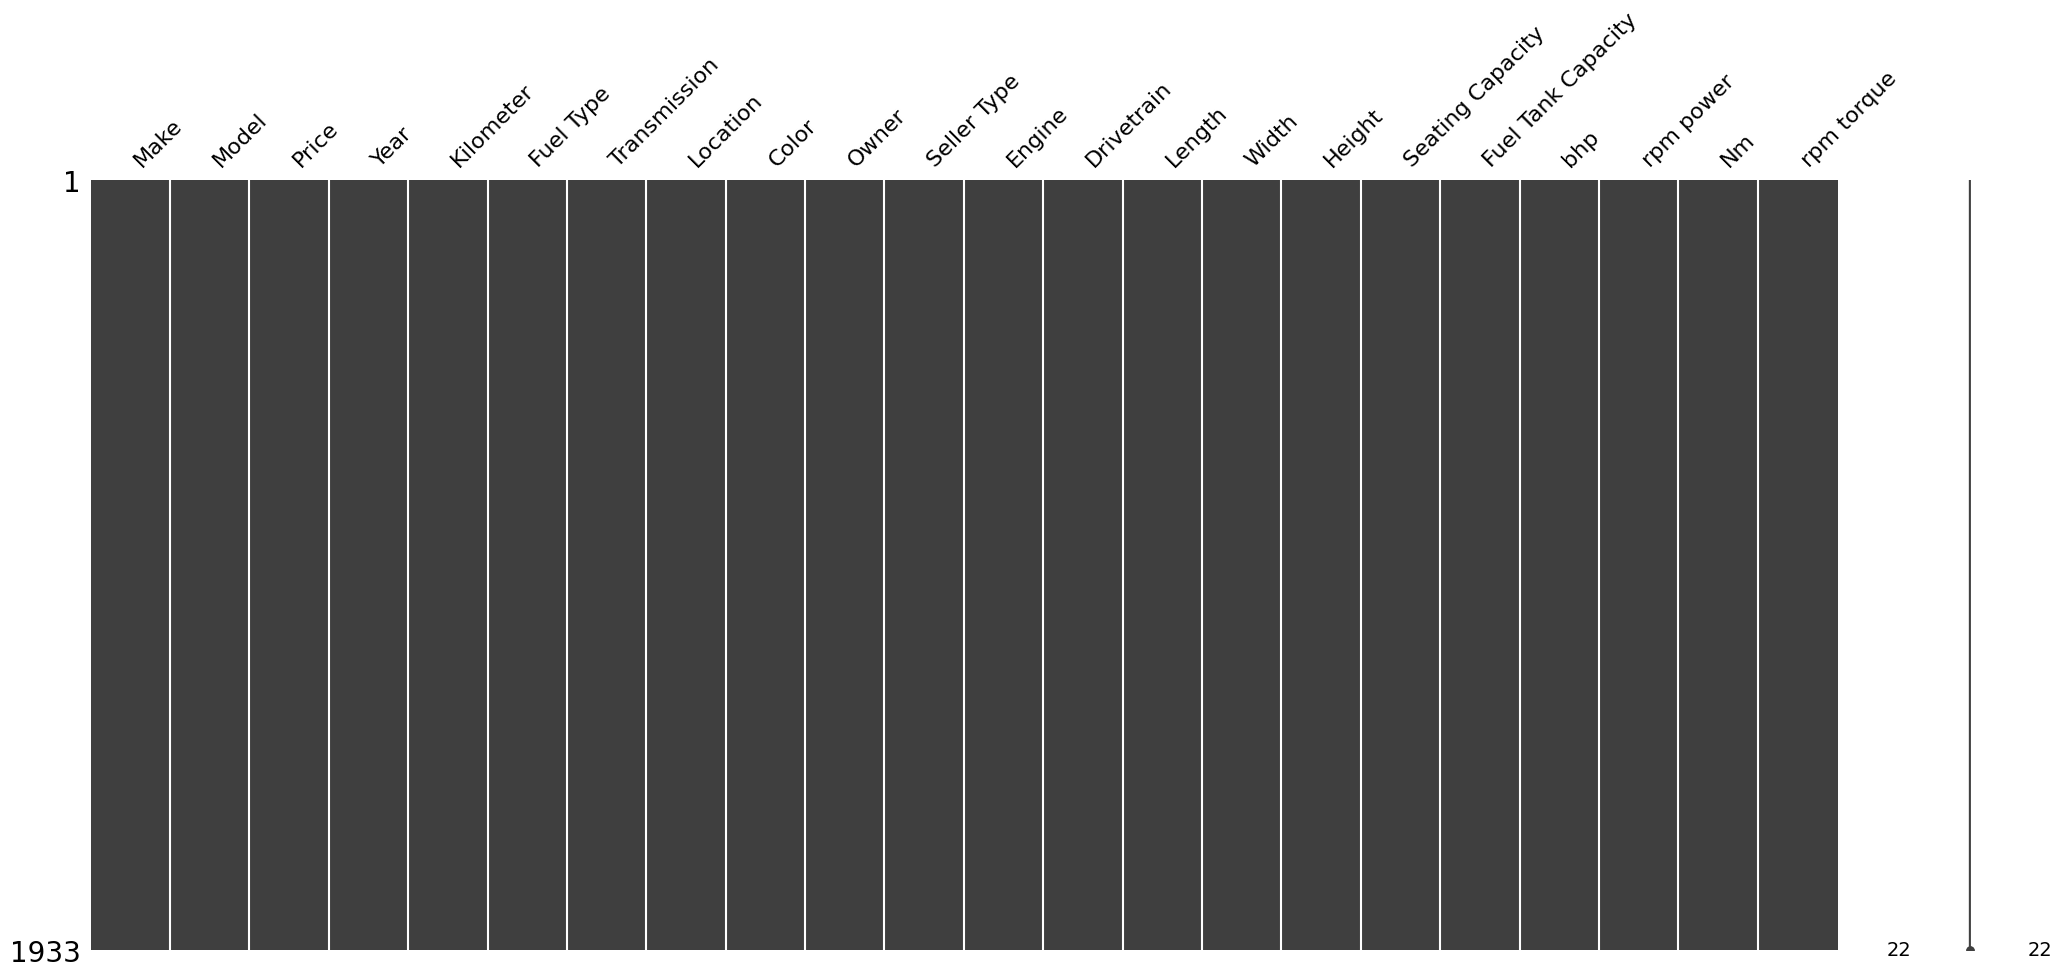

In [9]:

msno.matrix(full_df)


In [10]:

full_df.head()


Make                             Model    Price  Year  Kilometer  \
Make                                                                         
Audi 42   Audi  A4 2.0 TDI (177bhp) Premium Plus  1575000  2013      66000   
     72   Audi    A3 35 TDI Technology + Sunroof  2250000  2016      40500   
     81   Audi    Q3 35 TDI quattro Premium Plus  2900000  2018      35000   
     104  Audi                A6 2.0 TDI Premium  1325000  2012      98580   
     119  Audi    A3 35 TDI Technology + Sunroof  3050000  2020      40910   

         Fuel Type Transmission   Location  Color  Owner  ... Drivetrain  \
Make                                                      ...              
Audi 42     Diesel    Automatic  Hyderabad  White  First  ...        FWD   
     72     Diesel    Automatic        Goa  White  First  ...        FWD   
     81     Diesel    Automatic       Pune  White  First  ...        AWD   
     104    Diesel    Automatic        Goa  White  First  ...        FWD   
     119    Diesel    Automatic  Bangalore  White  First  ...        FWD   

          Length   Width  Height  Seating Capacity  Fuel Tank Capacity  bhp  \
Make                                                                          
Audi 42   4701.0  1826.0  1427.0               5.0                63.0  177   
     72   4456.0  1796.0  1416.0               5.0                50.0  141   
     81   4385.0  1831.0  1608.0               5.0                64.0  184   
     104  4915.0  1874.0  1455.0               5.0                65.0  177   
     119  4456.0  1796.0  1416.0               5.0                50.0  141   

          rpm power   Nm rpm torque  
Make                                 
Audi 42        4200  380       1750  
     72        3500  320       1750  
     81        3500  380       1750  
     104       3750  380       1750  
     119       3500  320       1750  

[5 rows x 22 columns]

In [11]:
year_mapping = {year: index for index, year in enumerate(sorted(full_df['Year'].unique()))}
full_df['Year'] = full_df['Year'].map(year_mapping)



full_df = full_df.dropna()



norm1 = ['Price']
norm2 = ['bhp', 'rpm power', 'Nm', 'rpm torque']
columns_to_normalize = ['Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'bhp', 'rpm power', 'Nm', 'rpm torque']

scaler = preprocessing.StandardScaler()
price_scaler = preprocessing.StandardScaler()
full_df[norm1] = price_scaler.fit_transform(full_df[norm1])
full_df[norm2] = scaler.fit_transform(full_df[norm2])
full_df[columns_to_normalize] = scaler.fit_transform(full_df[columns_to_normalize])


<Axes: >

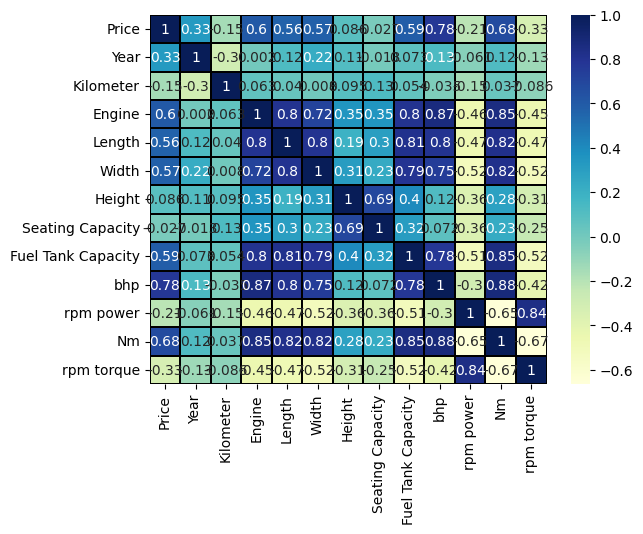

In [12]:


analysis_df = full_df.drop(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'], axis=1)

sns.heatmap(analysis_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.1, linecolor='black')



In [13]:

full_df.head()


Make                             Model     Price  Year  Kilometer  \
Make                                                                          
Audi 42   Audi  A4 2.0 TDI (177bhp) Premium Plus -0.042671     8   0.207298   
     72   Audi    A3 35 TDI Technology + Sunroof  0.238576    11  -0.228226   
     81   Audi    Q3 35 TDI quattro Premium Plus  0.509407    13  -0.322163   
     104  Audi                A6 2.0 TDI Premium -0.146837     7   0.763744   
     119  Audi    A3 35 TDI Technology + Sunroof  0.571907    15  -0.221224   

         Fuel Type Transmission   Location  Color  Owner  ... Drivetrain  \
Make                                                      ...              
Audi 42     Diesel    Automatic  Hyderabad  White  First  ...        FWD   
     72     Diesel    Automatic        Goa  White  First  ...        FWD   
     81     Diesel    Automatic       Pune  White  First  ...        AWD   
     104    Diesel    Automatic        Goa  White  First  ...        FWD   
     119    Diesel    Automatic  Bangalore  White  First  ...        FWD   

            Length     Width    Height  Seating Capacity  Fuel Tank Capacity  \
Make                                                                           
Audi 42   0.970924  0.463053 -1.211752         -0.370757            0.725501   
     72   0.414643  0.238004 -1.293219         -0.370757           -0.134388   
     81   0.253435  0.500561  0.128754         -0.370757            0.791646   
     104  1.456820  0.823132 -1.004381         -0.370757            0.857792   
     119  0.414643  0.238004 -1.293219         -0.370757           -0.134388   

               bhp  rpm power        Nm  rpm torque  
Make                                                 
Audi 42   0.776875  -0.591621  1.001386   -0.741181  
     72   0.208386  -1.229001  0.566705   -0.741181  
     81   0.887415  -1.229001  1.001386   -0.741181  
     104  0.776875  -1.001365  1.001386   -0.741181  
     119  0.208386  -1.229001  0.566705   -0.741181  

[5 rows x 22 columns]

In [14]:

def one_hot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df
full_df = one_hot_encode(full_df, columns=['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'])




y = full_df[['Price']].values
X = full_df[['Engine']].values


In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score of trivial model: %.2f" % r2score)



y_adv = y
X_adv = full_df[['Year','Kilometer','Engine','Length','Width','Height','Seating Capacity','Fuel Tank Capacity']].values




model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score of sklearn model: %.2f" % r2score)



R2 Score of trivial model: 0.40
R2 Score of sklearn model: 0.40


In [16]:

model.score(X_test, y_test)





y_fin = y
X_fin = full_df[['Year','Kilometer','Engine','Length','Width','Height','Seating Capacity','Fuel Tank Capacity']].values

X_train, X_test, y_train, y_test = train_test_split(X_fin, y_fin, test_size=0.4, random_state=69)

mlr = multipleLinearRegression()
W, train_loss, num_epochs = mlr.train(X_train, y_train)
test_pred, test_loss = mlr.test(X_test, y_test, W)



In [17]:

r2 = mlr.score(y_test, y_pred)
rmse = mlr.score_rmse(y_test, y_pred)
st.write("Multiple linear regression model R2 Score: ", r2)
st.write("Multiple linear regression model Root Mean Squared Error: ", rmse)



year = st.sidebar.number_input('Manufacturing year', min_value=1988, max_value=2022, value=2017)
kilometer = st.sidebar.number_input('Kilometers driven', min_value=0, max_value=1000000, value=80000)
engine = st.sidebar.number_input('Engine capacity, cc', min_value=0, max_value=10000, value=1200)
length = st.sidebar.number_input('Length, mm', min_value=0, max_value=10000, value=3992)
width = st.sidebar.number_input('Width, mm', min_value=0, max_value=10000, value=1687)
height = st.sidebar.number_input('Height, mm', min_value=0, max_value=10000, value=1525)
seating_capacity = st.sidebar.number_input('Seating Capacity', min_value=0, max_value=6, value=5)
fuel_tank_capacity = st.sidebar.number_input('Fuel Tank Capacity, l', min_value=0, max_value=500, value=39)



if st.button('Predict Price'):
    data = pd.DataFrame([[year, kilometer, engine, length, width, height, seating_capacity, fuel_tank_capacity]], columns=['Year','Kilometer','Engine','Length','Width','Height','Seating Capacity','Fuel Tank Capacity'])
    data['Year'] = data['Year'].map(year_mapping)
    cols = ['Kilometer','Engine','Length','Width','Height','Seating Capacity','Fuel Tank Capacity']
    data[cols] = scaler.transform(data[cols])
    


    input_data_as_numpy_array = np.asarray(data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
    print(input_data_reshaped)
    X_sample_reshaped = input_data_reshaped.flatten()
    print(X_sample_reshaped)
    price = mlr.predict(W, X_sample_reshaped)
    price = price_scaler.inverse_transform(np.array([price]).reshape(1, -1))
    st.write('The predicted price of the car is ', str(price).replace('[[', '').replace(']]', ''))


2024-01-24 18:52:46.207 
  command:

    streamlit run C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
